Top 5 Crimes in Northeast Region (2020):
VEHICLE - STOLEN                                           1042
BURGLARY FROM VEHICLE                                       656
BURGLARY                                                    615
THEFT PLAIN - PETTY ($950 & UNDER)                          613
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     574
Name: Crm Cd Desc, dtype: int64




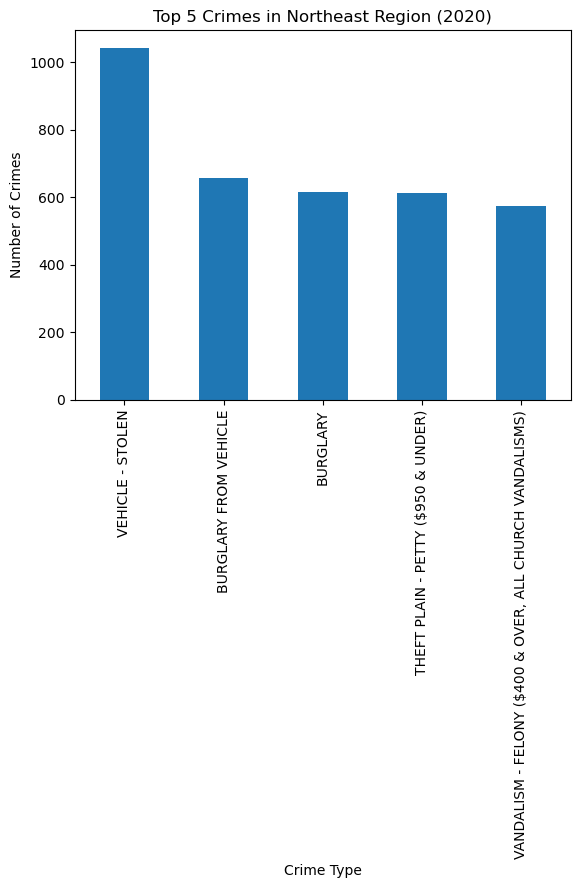

Top 5 Crimes in Northeast Region (2021):
VEHICLE - STOLEN                                           1195
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     648
THEFT PLAIN - PETTY ($950 & UNDER)                          624
BURGLARY FROM VEHICLE                                       615
BATTERY - SIMPLE ASSAULT                                    590
Name: Crm Cd Desc, dtype: int64




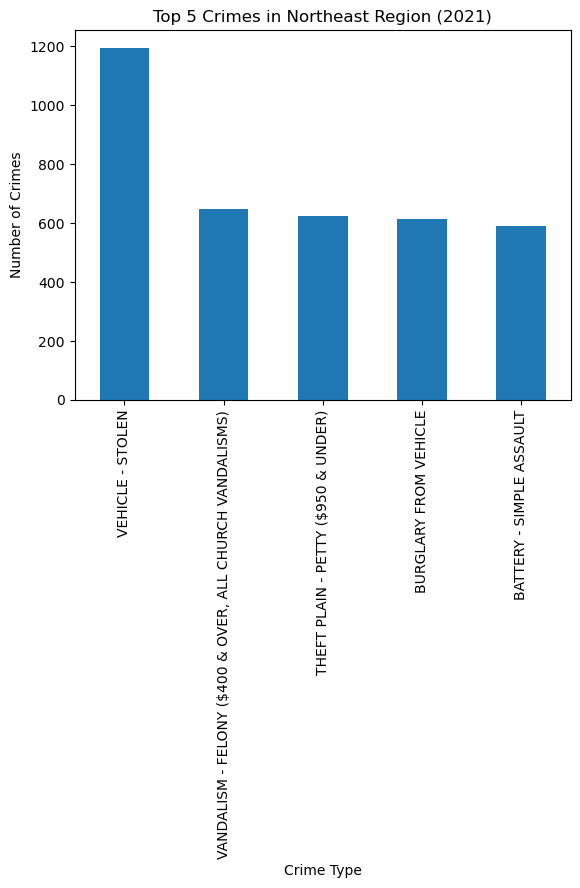

Top 5 Crimes in Northeast Region (2022):
VEHICLE - STOLEN                                       1168
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)     753
BURGLARY FROM VEHICLE                                   718
THEFT OF IDENTITY                                       701
BATTERY - SIMPLE ASSAULT                                691
Name: Crm Cd Desc, dtype: int64




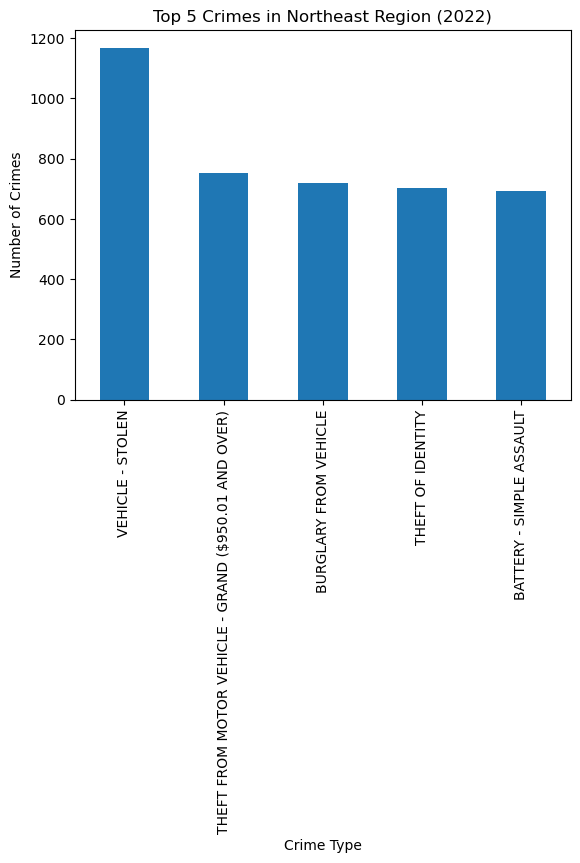

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from the CSV file
data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")


# Convert date columns to datetime objects
data["DATE OCC"] = pd.to_datetime(data["DATE OCC"], errors='coerce')
data["Date Rptd"] = pd.to_datetime(data["Date Rptd"], errors='coerce')



# Filter data by region (Northeast Los Angeles)
northeast_data = data[data["AREA NAME"] == "Northeast"]

# Create a DataFrame for each year
years = [2020, 2021, 2022]
data_by_year = {year: northeast_data[northeast_data["DATE OCC"].dt.year == year] for year in years}

# 1. Top 5 crimes in each region (Bar chart)
for year, df in data_by_year.items():
    top_5_crimes = df["Crm Cd Desc"].value_counts().head(5)

    # Print the table for the bar chart
    print(f"Top 5 Crimes in Northeast Region ({year}):")
    print(top_5_crimes)
    print("\n")

    # Plot the bar chart
    plt.figure()
    top_5_crimes.plot(kind='bar')
    plt.title(f"Top 5 Crimes in Northeast Region ({year})")
    plt.xlabel("Crime Type")
    plt.ylabel("Number of Crimes")
    plt.show()




Top 5 Crimes vs Years:
                                                    2020  2021  2022
VEHICLE - STOLEN                                    1042  1195  1168
BURGLARY FROM VEHICLE                                656   615   718
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...   574   648   668
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...   351   568   753
BATTERY - SIMPLE ASSAULT                             550   590   691




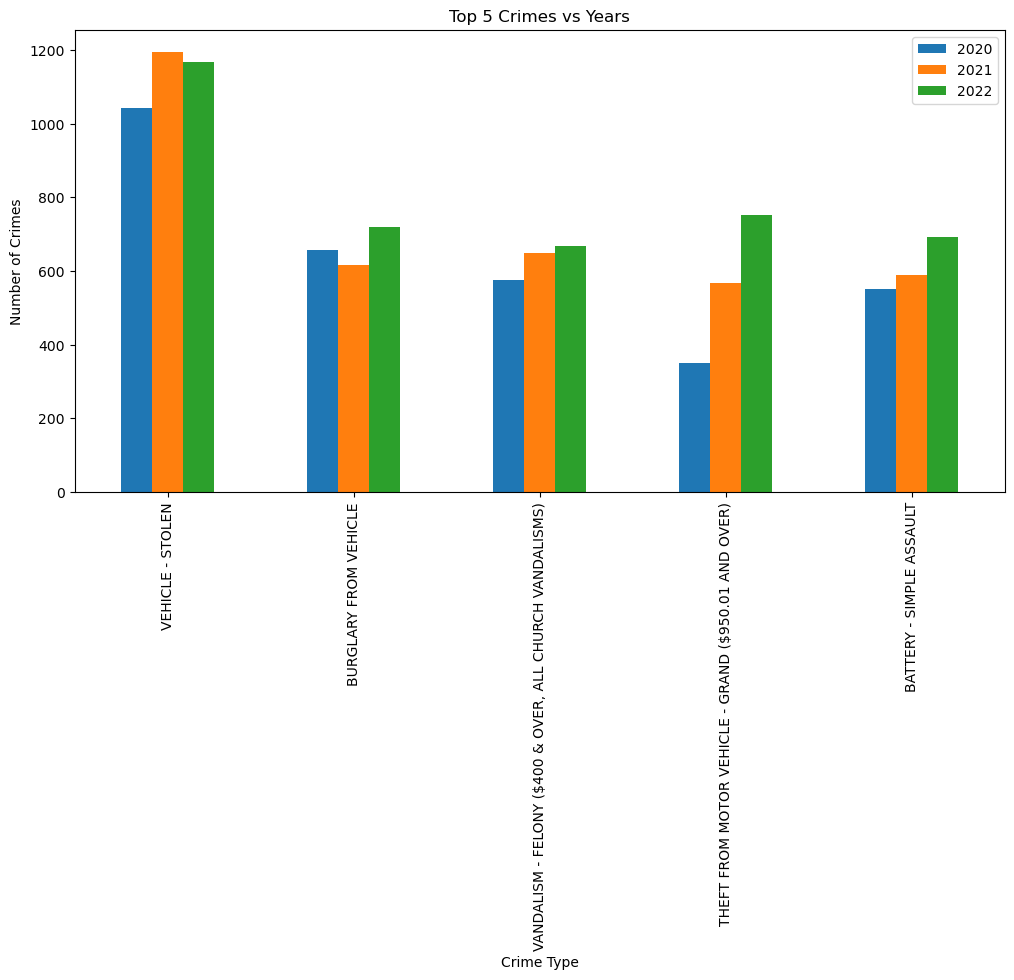

In [7]:
# 2. Top 5 crimes vs years (Bar Chart)
top_5_crimes_overall = northeast_data["Crm Cd Desc"].value_counts().head(5).index.tolist()

# Calculate the number of top 5 crimes by year
crime_counts_by_year = {}
for year, crimes in data_by_year.items():
    crime_counts_by_year[year] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Print the table for the bar chart
print("Top 5 Crimes vs Years:")
print(pd.DataFrame(crime_counts_by_year))
print("\n")

# Plot the bar chart
yearly_crime_counts_df = pd.DataFrame(crime_counts_by_year)
yearly_crime_counts_df.plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 Crimes vs Years")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

In [8]:
# # 2-1. Top 5 crimes vs seasons (Bar Chart)
# seasons = {"Winter": [12, 1, 2], "Spring": [3, 4, 5], "Summer": [6, 7, 8], "Fall": [9, 10, 11]}
# crimes_by_season = {season: northeast_data[northeast_data["DATE OCC"].dt.month.isin(months)] for season, months in seasons.items()}
# top_5_crimes_overall = northeast_data["Crm Cd Desc"].value_counts().head(5).index.tolist()

# # Calculate the number of top 5 crimes by season
# crime_counts_by_season = {}
# for season, crimes in crimes_by_season.items():
#     crime_counts_by_season[season] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]


# # Print the table for the bar chart
# print("Top 5 Crimes vs Seasons:")
# print(pd.DataFrame(crime_counts_by_season))
# print("\n")
# # Plot the bar chart
# seasonal_crime_counts_df = pd.DataFrame(crime_counts_by_season)
# seasonal_crime_counts_df.plot(kind="bar", figsize=(12, 6))
# plt.title("Top 5 Crimes vs Seasons")
# plt.xlabel("Crime Type")
# plt.ylabel("Number of Crimes")
# plt.show()

# # Calculate the number of top 5 crimes for Winter season in each year
# winter_crime_counts_by_year = {}
# for year, df in data_by_year.items():
#     winter_data = df[df["DATE OCC"].dt.month.isin(seasons["Winter"])]
#     winter_crime_counts_by_year[year] = winter_data["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# # Display the Winter crime counts for each year
# for year, winter_crime_counts in winter_crime_counts_by_year.items():
#     print(f"Winter crime counts for {year}:")
#     print(winter_crime_counts)
#     print("\n")

# # Print the table for the bar graph
# print("Top 5 Crimes in Winter Season (Last 2 Years):")
# print(pd.DataFrame(winter_crime_counts_by_year))
# print("\n")

# # Create a DataFrame for Winter crime counts for each year
# winter_crime_counts_df = pd.DataFrame(winter_crime_counts_by_year)

# # Plot the bar graph
# ax = winter_crime_counts_df.plot.bar(rot=90, figsize=(12, 6))
# ax.set_ylabel("Number of Crimes")
# ax.set_title("Top 5 Crimes in Winter Season (Last 2 Years)")
# plt.xticks(range(len(top_5_crimes_overall)), top_5_crimes_overall)
# plt.legend(title="Year")
# plt.show()



Top 5 Crimes vs Month (2020 - 2022):
Crm Cd Desc  BATTERY - SIMPLE ASSAULT  BURGLARY FROM VEHICLE  \
DATE OCC                                                       
2020-01                            51                     80   
2020-02                            47                     73   
2020-03                            52                     74   
2020-04                            44                     74   
2020-05                            60                     57   
2020-06                            46                     59   
2020-07                            41                     50   
2020-08                            42                     25   
2020-09                            60                     44   
2020-10                            43                     29   
2020-11                            34                     37   
2020-12                            30                     54   
2021-01                            23                     59   
202

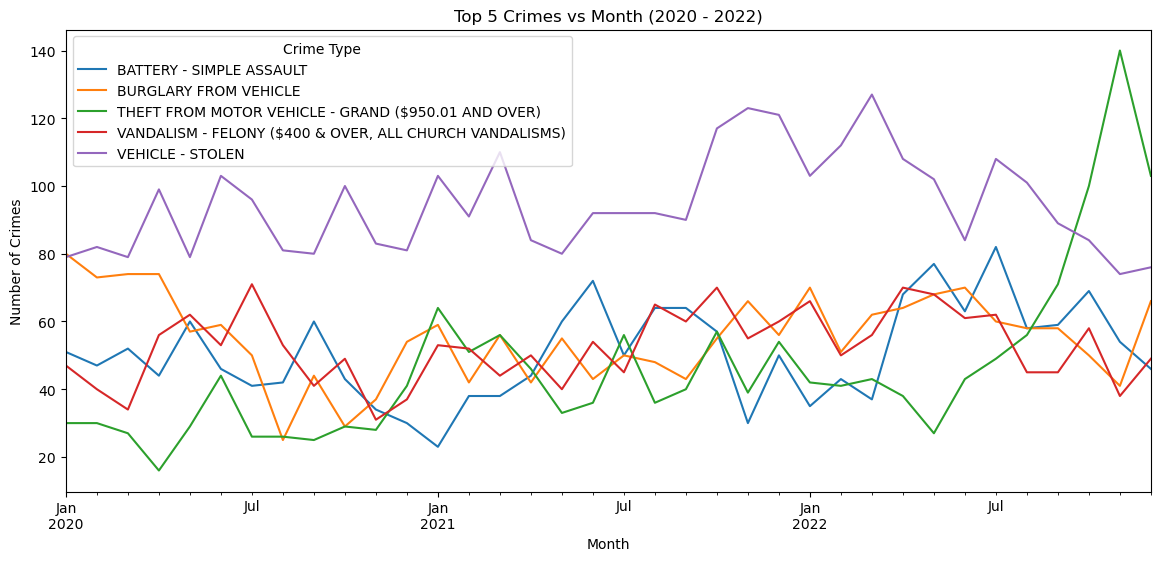

Top 5 Crimes During Socioeconomic Events:
                                                    Pre-COVID  During COVID  \
VEHICLE - STOLEN                                         2689         41736   
BURGLARY FROM VEHICLE                                    2679         23503   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...       2142         24452   
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...        856         11444   
BATTERY - SIMPLE ASSAULT                                 2976         29539   

                                                    Post-COVID  \
VEHICLE - STOLEN                                         32482   
BURGLARY FROM VEHICLE                                    18450   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...       17491   
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...       14125   
BATTERY - SIMPLE ASSAULT                                 24157   

                                                    During Inflation  \
VEHICLE - STOL

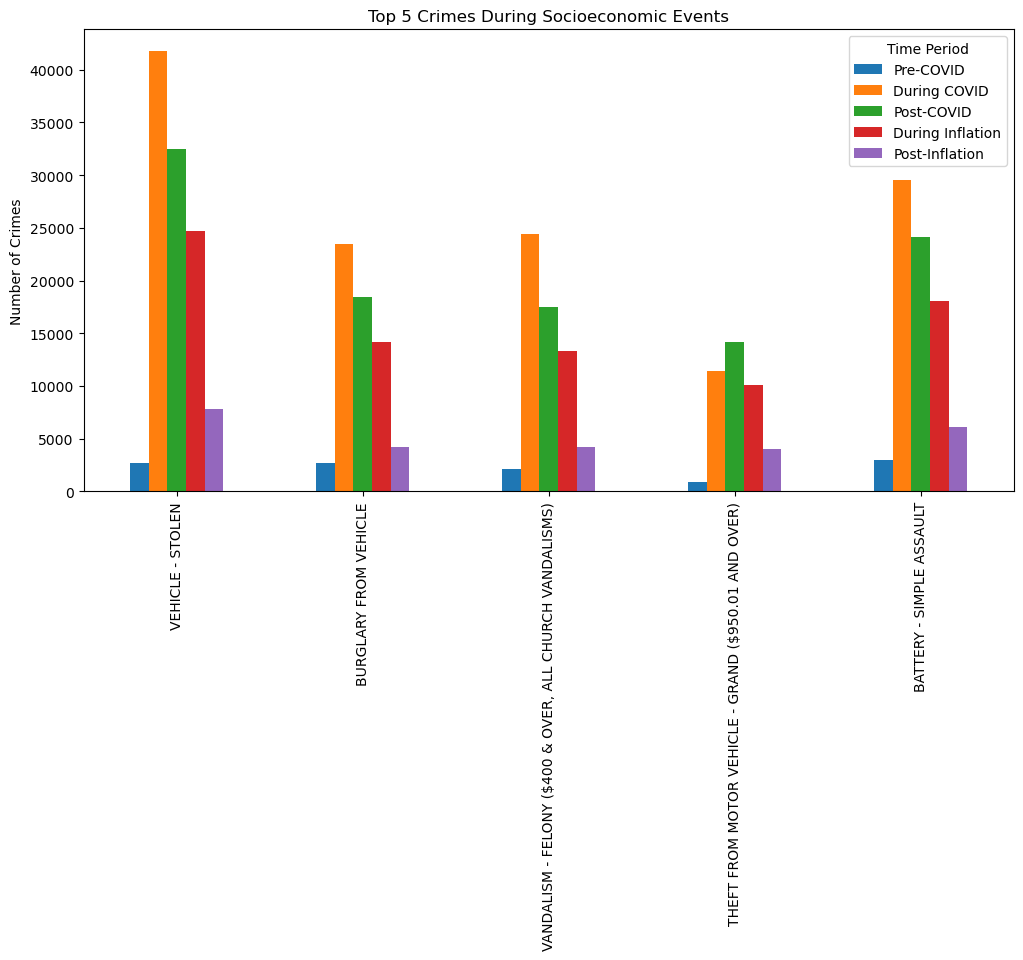

In [9]:
# 3. Top 5 crimes vs month (Line chart)
top_5_crimes_overall = northeast_data["Crm Cd Desc"].value_counts().head(5).index.tolist()
top_5_crimes_data = northeast_data[(northeast_data["Crm Cd Desc"].isin(top_5_crimes_overall)) & (northeast_data["DATE OCC"].dt.year <= 2022)]
crimes_by_month = top_5_crimes_data.groupby([top_5_crimes_data["DATE OCC"].dt.to_period("M"), "Crm Cd Desc"]).size().unstack().fillna(0)

# Print the table for the line chart
print("Top 5 Crimes vs Month (2020 - 2022):")
print(crimes_by_month)
print("\n")

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 6))
crimes_by_month.plot(ax=ax)
plt.title("Top 5 Crimes vs Month (2020 - 2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")
plt.show()


top_5_crimes = top_5_crimes_overall[:5]

pre_covid_period = (data["DATE OCC"] < "2020-03-01")
during_covid_period = (data["DATE OCC"] >= "2020-03-01") & (data["DATE OCC"] <= "2021-12-31")
post_covid_period = (data["DATE OCC"] > "2021-12-31")

# Adjust the inflation periods if needed
during_inflation_period = (data["DATE OCC"] >= "2022-01-01") & (data["DATE OCC"] <= "2022-12-31")
post_inflation_period = (data["DATE OCC"] > "2022-12-31")

pre_covid_crime_counts = data[pre_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
during_covid_crime_counts = data[during_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
post_covid_crime_counts = data[post_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]

during_inflation_crime_counts = data[during_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
post_inflation_crime_counts = data[post_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]


crime_counts_by_period = pd.DataFrame({
    "Pre-COVID": pre_covid_crime_counts,
    "During COVID": during_covid_crime_counts,
    "Post-COVID": post_covid_crime_counts,
    "During Inflation": during_inflation_crime_counts,
    "Post-Inflation": post_inflation_crime_counts
})


# Print the table for the bar chart
print("Top 5 Crimes During Socioeconomic Events:")
print(crime_counts_by_period)
print("\n")


ax = crime_counts_by_period.plot.bar(rot=90, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 5 Crimes During Socioeconomic Events")
plt.xticks(range(len(top_5_crimes)), top_5_crimes)
plt.legend(title="Time Period")
plt.show()